Exercise Sheet 2 **PCA: batch preprocessing and online-PCA**

In [1]:
#Machine intelligence SoSe '19 Exercise 2
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, decomposition
from IPython.display import Image
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.colors as colors

In [2]:
def do_center(array):
    return array-(np.sum(array, axis=0)/len(array))

def calc_cov_mat(array):
    array = do_center(array)
    return np.matmul(array.T, array)

def calc_PCA(data_array):
    # calculating covariance matrix
    cov_mat = calc_cov_mat(data_array)

    # calculating eigenvectors and eigenvalues
    eigvals, eigvecs = np.linalg.eig(cov_mat)

    # sorting based on largest eigen-values
#     normed_eigvals = eigvals/np.sqrt(np.sum(eigvals**2))
#     sorted_eigvals = np.flip(np.sort(normed_eigvals))
#     sorted_eigvecs = np.array(eigvecs[:, np.flip(np.argsort(eigvals))])
    return eigvecs #sorted_eigvecs


**2.1: Preprocessing**

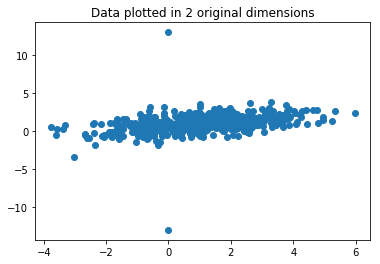

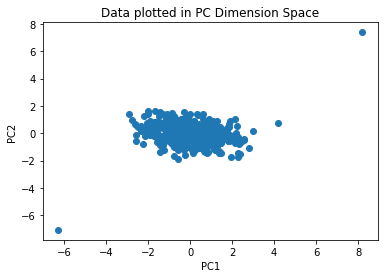


 The eigenvalues are: [1.38088454 0.62313152] 
 The eigenvector compenents are: 
 [[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


In [3]:
# a

data = np.genfromtxt('pca2.csv',delimiter=',')[1:-1]
plt.scatter(data[:,0],data[:,1])
plt.title('Data plotted in 2 original dimensions')
plt.show()

cd = preprocessing.scale(data)
dm = decomposition.PCA(2)
pcad = dm.fit_transform(cd)
dm_evec, dm_eval = dm.components_, dm.explained_variance_

plt.scatter(pcad[:,0],pcad[:,1])
# for i,x in enumerate(dm_eval):
#     plt.quiver(x*dm_evec[i,0],x*dm_evec[i,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Data plotted in PC Dimension Space')
plt.show()

print('\n The eigenvalues are: {} \n The eigenvector compenents are: \n {}'.format(dm_eval,dm_evec))

There appear to be two outliers in the PC1 vs. PC2 dimensions space.

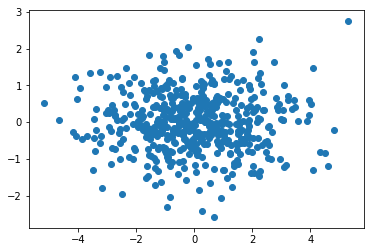

[[-0.93554258 -0.35321393]
 [ 0.35321393 -0.93554258]] [3.05347715 0.64141385]


In [4]:
# b

#deleting observations 17 and 157
omitd = np.delete(data,[16,156],0)

cd = preprocessing.scale(omitd)
dm = decomposition.PCA(2)
pcad = dm.fit_transform(omitd)
dm_evec, dm_eval = dm.components_, dm.explained_variance_

plt.scatter(pcad[:,0],pcad[:,1])
plt.show()

print(dm_evec, dm_eval)

In [5]:
print('Without observations 17 and 157, the eigenvectors and the eigenvalues change dramatically. \n The eigenvalues are: {} \n The eigenvector compenents are: \n {}'.format(dm_eval,dm_evec))

Without observations 17 and 157, the eigenvectors and the eigenvalues change dramatically. 
 The eigenvalues are: [3.05347715 0.64141385] 
 The eigenvector compenents are: 
 [[-0.93554258 -0.35321393]
 [ 0.35321393 -0.93554258]]


**2.2 Whitening**

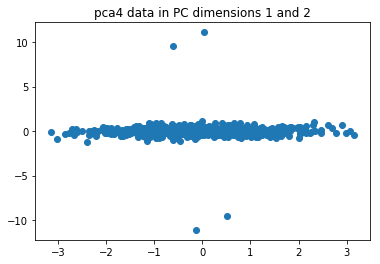

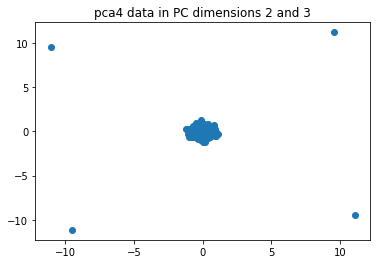

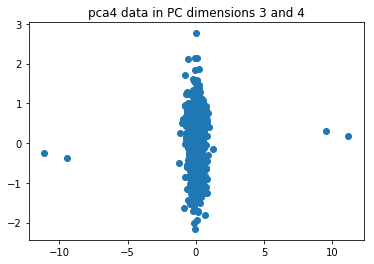

Data samples [ 99 111 199 211] are outliers


In [6]:
# 2.2a

data2 = np.genfromtxt('pca4.csv',delimiter=',')[1:-1]
cd2 = preprocessing.scale(data2)
dm2 =  decomposition.PCA(4)
pcad2 = dm2.fit_transform(cd2)
dm2_evec, dm2_eval = dm2.components_, dm2.explained_variance_

#Checking for outliers by plotting out in three permutations of 2-dimensions PC spaces
plt.scatter(pcad2[:,0],pcad2[:,1])
plt.title('pca4 data in PC dimensions 1 and 2')
plt.show()

plt.scatter(pcad2[:,1],pcad2[:,2])
plt.title('pca4 data in PC dimensions 2 and 3')
plt.show()


plt.scatter(pcad2[:,2],pcad2[:,3])
plt.title('pca4 data in PC dimensions 3 and 4')
plt.show()

outliers = np.where(np.abs(pcad2[:,1])>5)[0]
print('Data samples {} are outliers'.format(outliers))

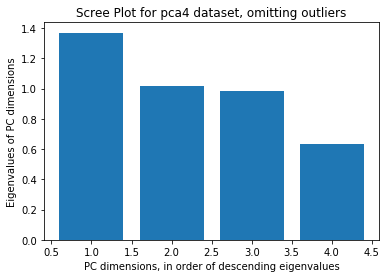

In [7]:
# 2.2b

#creating data subset omitting the outliers
omitd22b = np.delete(data2,outliers,0)
cd22b = preprocessing.scale(omitd22b)
dm22b =  decomposition.PCA(4)
pcad22b = dm22b.fit_transform(cd22b)
dm22b_evec, dm22b_eval = dm22b.components_ , dm22b.explained_variance_

# #checking for no whitening
# for i,x, in enumerate(np.arange(0,pcad22b.shape[1])):
#     print('Mean of dimension', x,'is', np.mean(pcad22b[:,i]),'\n Std is',np.std(pcad22b[:,i]),'\n')

#plotting scree plot
plt.bar(np.arange(1,5),dm22b.explained_variance_)
plt.title('Scree Plot for pca4 dataset, omitting outliers')
plt.ylabel('Eigenvalues of PC dimensions')
plt.xlabel('PC dimensions, in order of descending eigenvalues')
plt.show()

In [8]:
# 2.2c whiten the data

wdm22b =  decomposition.PCA(4, whiten=True)
wpcad22b = wdm22b.fit_transform(cd22b)
wdm22b_evec, wdm22b_eval = wdm22b.components_ , wdm22b.explained_variance_

#checking for whitening
for i,x, in enumerate(np.arange(0,wpcad22b.shape[1])):
    print('Mean of dimension', x,'is', np.mean(wpcad22b[:,i]),'\n Std is',np.std(wpcad22b[:,i]),'\n')

Mean of dimension 0 is -5.0240395457784865e-17 
 Std is 0.9989893883219173 

Mean of dimension 1 is -1.4354398702224246e-17 
 Std is 0.9989893883219167 

Mean of dimension 2 is 7.177199351112123e-18 
 Std is 0.9989893883219167 

Mean of dimension 3 is 6.100619448445304e-17 
 Std is 0.9989893883219174 



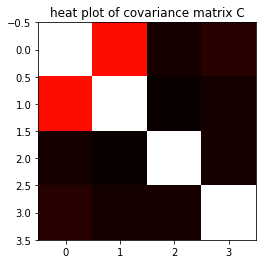

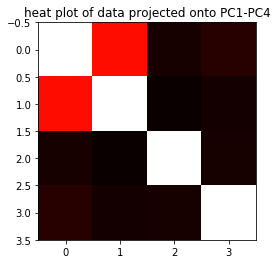

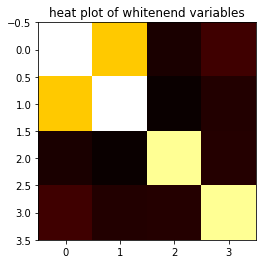

In [9]:
# 2.2d
# np.cov(pcad22b).shape

# # i
cov22di = dm22b.get_covariance()
plt.title('heat plot of covariance matrix C')
plt.imshow(cov22di, cmap='hot')
plt.show()

# ii projected onto PC1 - PC4
pdm22b =  decomposition.PCA(4) #but really should be 1 and 4th dimension, not 1 and 2
ppcad22b = pdm22b.fit_transform(cd22b,2)
cov22dii = pdm22b.get_covariance()

plt.title('heat plot of data projected onto PC1-PC4')
plt.imshow(cov22dii, cmap='hot', interpolation='nearest')
plt.show()

# # iii whitened
cov22di = wdm22b.get_covariance()
plt.title('heat plot of whitenend variables')
plt.imshow(cov22di, cmap='hot')
plt.show()

**2.3 Oja's Rule Derivation**

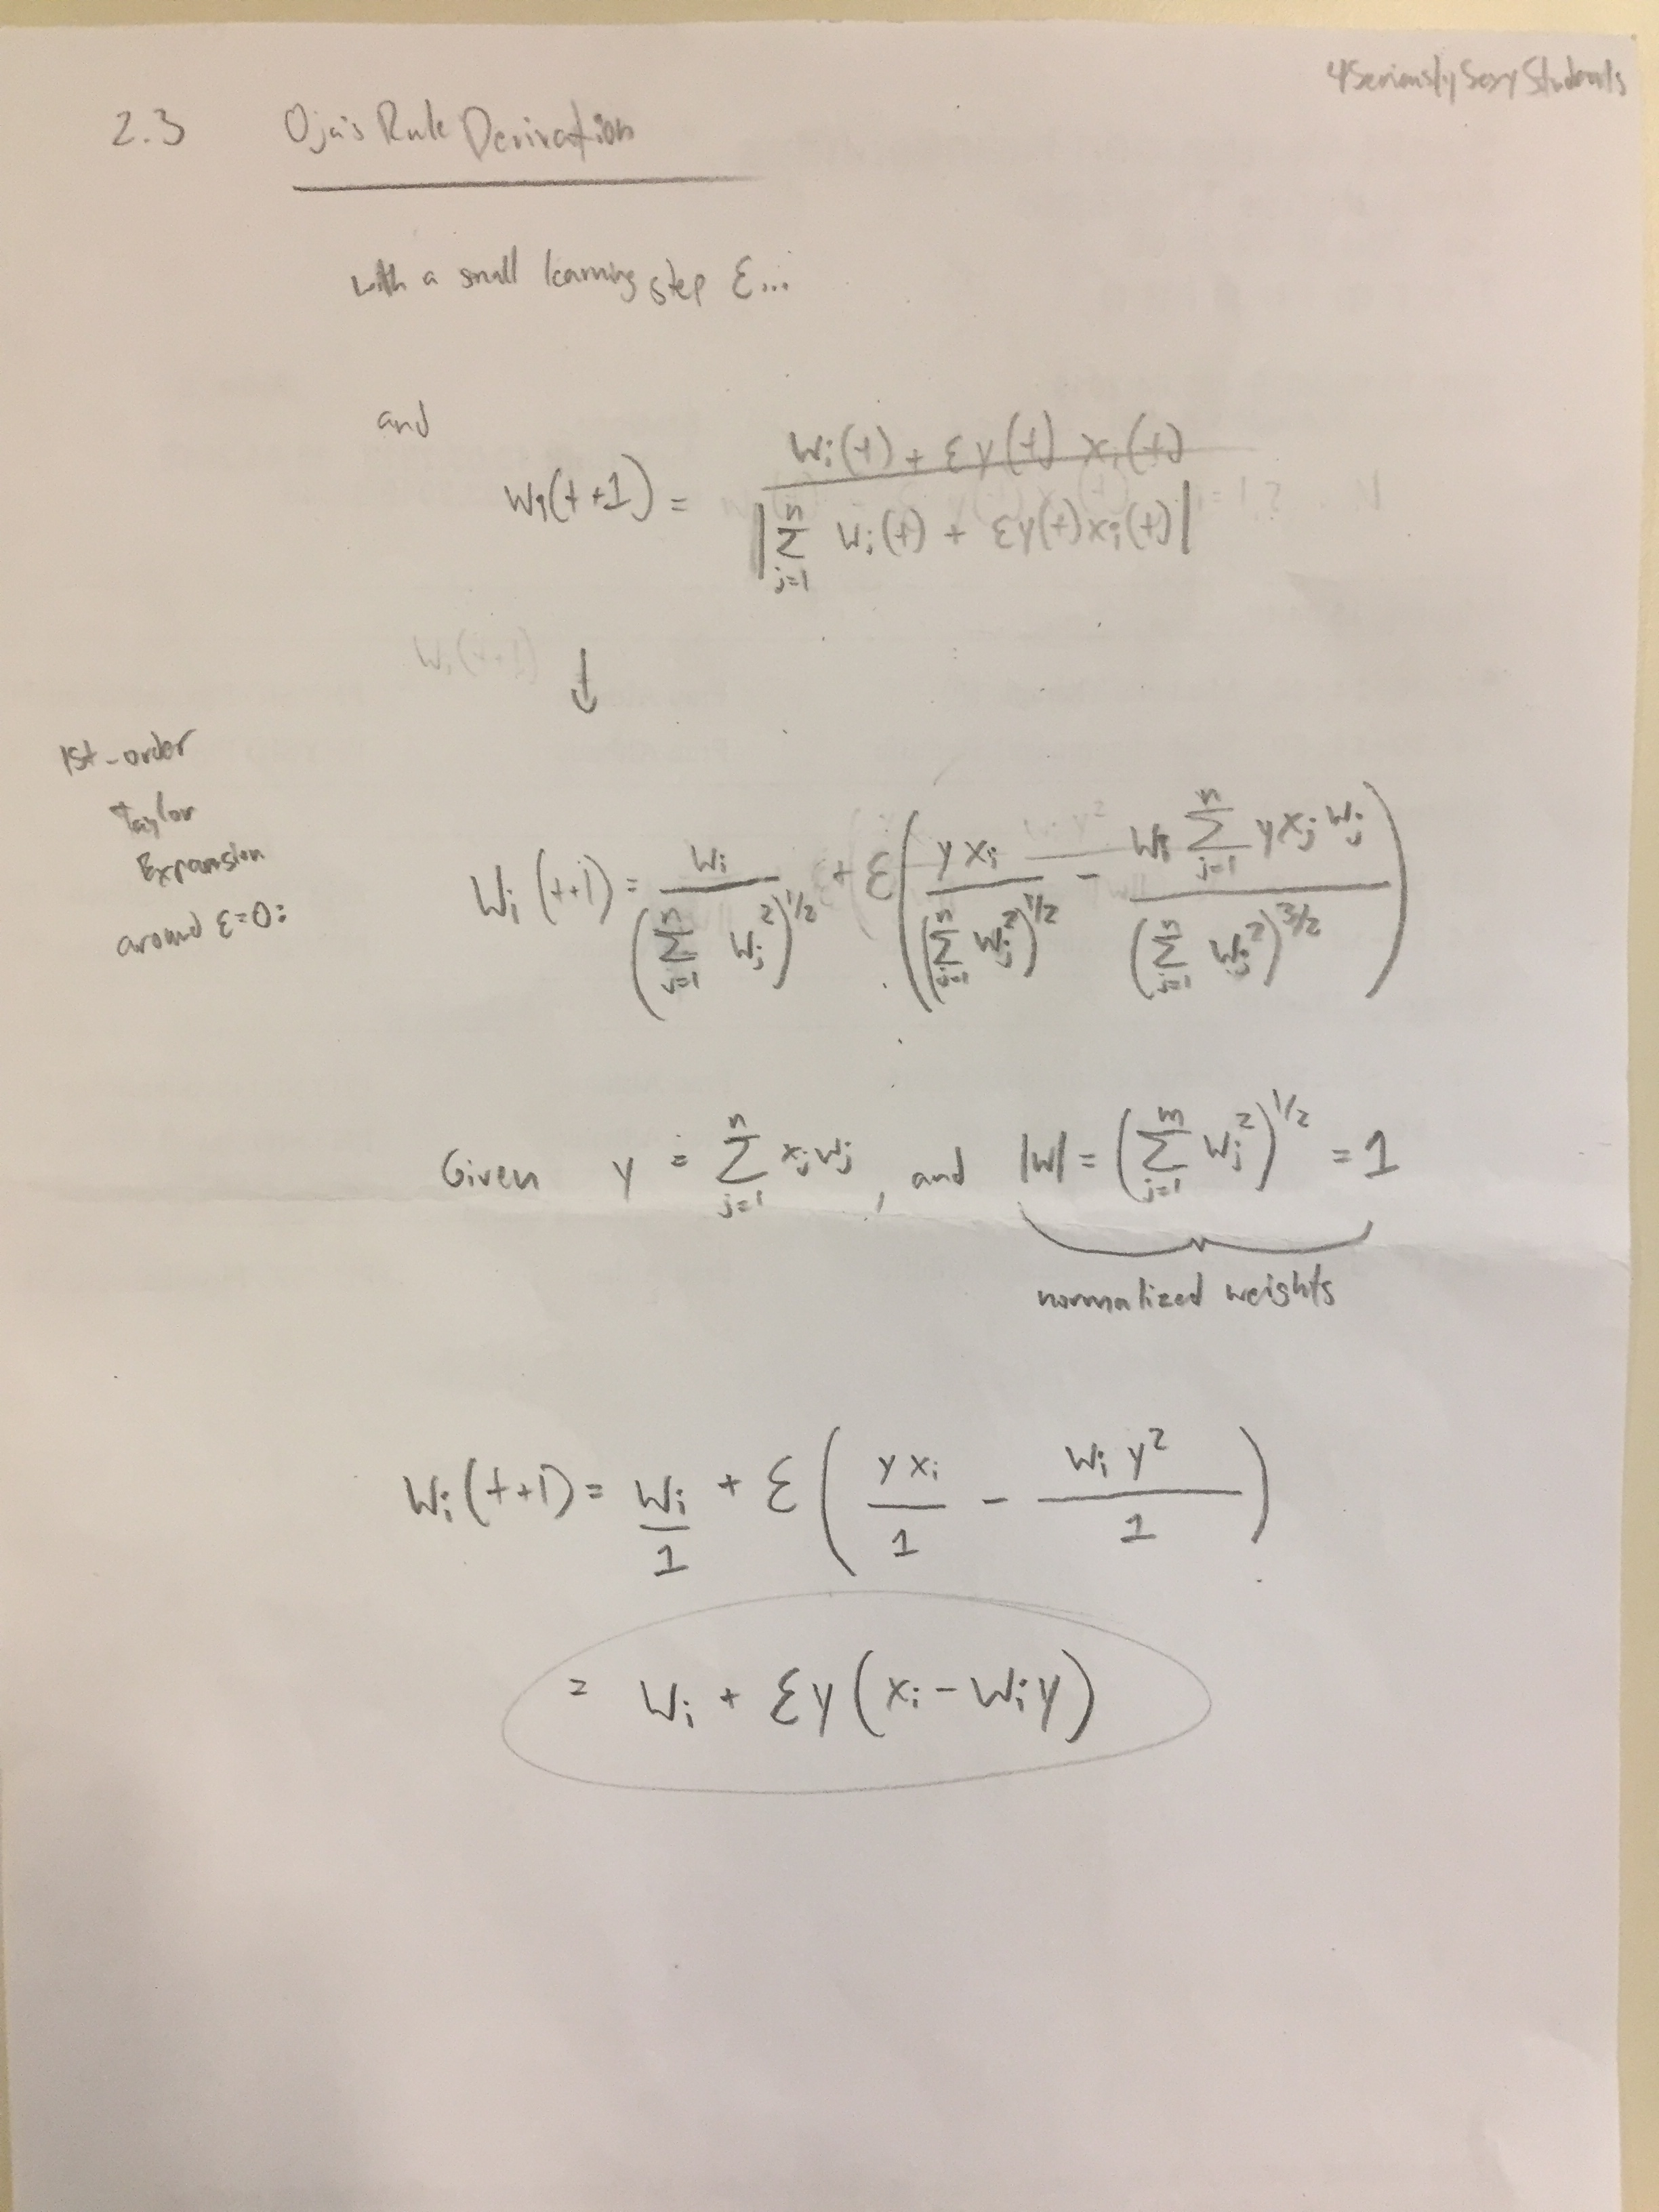

In [10]:
Image("IMG_2777.JPG")

**2.4 Oja’s Rule: Application**

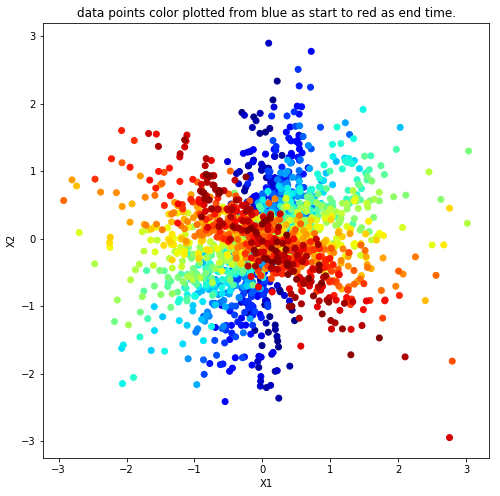

In [11]:
# 2.4a 

# reading the data into an array
onlinePCA_imp = np.genfromtxt('data-onlinePCA.txt', 'str')[1:]
onlinePCA_data = np.zeros((len(onlinePCA_imp), 3))
for i, row in enumerate(onlinePCA_imp):
    onlinePCA_data[i][0] = i
    onlinePCA_data[i][1:] = row.split(',')[1:]
    
# plotting with colors as time
plt.figure(figsize=(8,8))
plt.scatter(onlinePCA_data[:,1],
            onlinePCA_data[:,2],
            c=onlinePCA_data[:,0], cmap='jet')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('data points color plotted from blue as start to red as end time.')
plt.show()

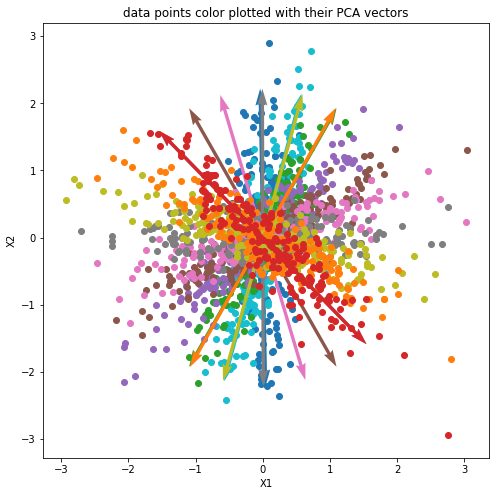

In [12]:
# 2.4b

# plotting
set_colors = ['tab:blue',
              'tab:cyan',
              'tab:green',
              'tab:purple',
              'tab:brown',
              'tab:pink',
              'tab:gray',
              'tab:olive',
              'tab:orange',
              'tab:red']

plt.figure(figsize=(8,8))
for i in range(10):
    # calculating PCAs
    PCAs = calc_PCA(onlinePCA_data[i*200:(i+1)*200,1:])
    plt.scatter(onlinePCA_data[i*200:(i+1)*200,1],
                onlinePCA_data[i*200:(i+1)*200,2],
                c=set_colors[i])
    plt.quiver(0, 0, PCAs[0, 1], PCAs[1, 1], scale=3, color = set_colors[i])
    plt.quiver(0, 0, -PCAs[0, 1], -PCAs[1, 1], scale=3, color = set_colors[i])
plt.title('data points color plotted with their PCA vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

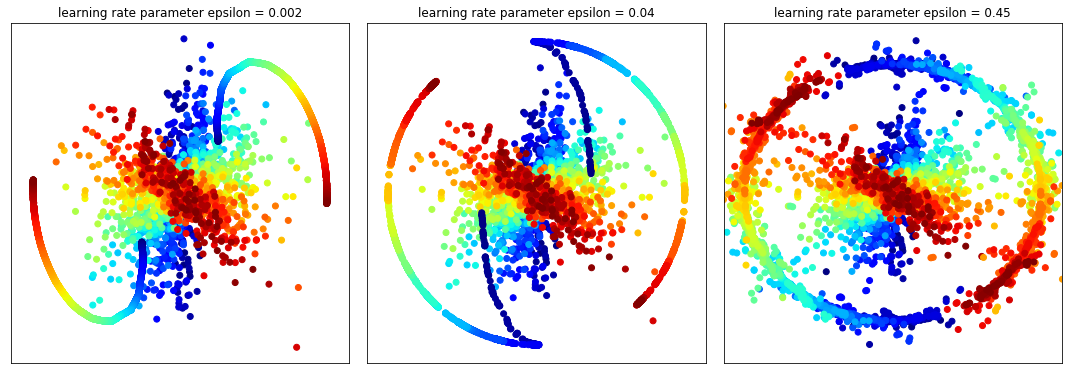

In [13]:
# 2.4c

def do_the_Oja(array, eps):
    W = np.random.uniform(-1, 1, size=(2))
    p = array.shape[0]
    i = 0
    Ws = np.zeros((p,3))
    for i in range(p):
        Y = array[i]@W
        W = W + eps * Y * (array[i] - Y*W)
        Ws[i,1:] = W
        Ws[i,0] = i
    return Ws
# learning rate parameter set
set_eps = [0.002, 0.04, 0.45]

# plotting with colors as time
plt.figure(figsize=(15,5.3))
for i, eps in enumerate(set_eps):
    weight_array = do_the_Oja(onlinePCA_data[:, 1:], eps)
    weight_array = weight_array*3.5 # for better visualization
    plt.subplot(1,3,i+1)
    plt.scatter(onlinePCA_data[:,1],
                onlinePCA_data[:,2],
                c=onlinePCA_data[:,0], cmap='jet')
    plt.scatter(weight_array[:,1],
                weight_array[:,2],
                c=weight_array[:,0], cmap='jet')
    plt.scatter(-weight_array[:,1],
                -weight_array[:,2],
                c=weight_array[:,0], cmap='jet')
    plt.xticks([])
    plt.yticks([])
    plt.xlim((-4, 4))
    plt.xlim((-4, 4))
    plt.title('learning rate parameter epsilon = %s' %eps)
plt.tight_layout()
plt.show()

If eta is small (.002), the calculation of the principal component lags behind the data changing in time. If eta large, PCA jumps sporadically.